/home/yanai-lab/tanabe-h/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yanai-lab/tanabe-h/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


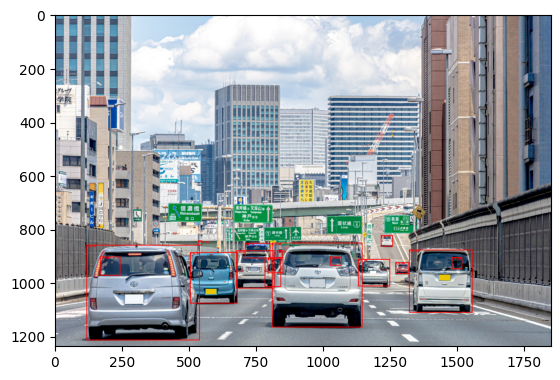

In [1]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load the pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load an image and perform preprocessing
image_path = 'road.jpg'
img = Image.open(image_path)
transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(img)
img_tensor = img_tensor.unsqueeze(0)

# Perform object detection
with torch.no_grad():
    predictions = model(img_tensor)

# Filter predictions with a threshold confidence score
confidence_threshold = 0.5
filtered_predictions = [
    (box, label, score)
    for box, label, score in zip(
        predictions[0]["boxes"], predictions[0]["labels"], predictions[0]["scores"]
    )
    if score > confidence_threshold
]

# Function to display the detected objects
def display_image_with_boxes(image, boxes, labels, scores):
    img_copy = image.copy()
    draw = ImageDraw.Draw(img_copy)
    
    for box, label, score in zip(boxes, labels, scores):
        x1, y1, x2, y2 = box
        draw.rectangle([x1, y1, x2, y2], outline=(255, 0, 0), width=3)
        draw.text((x1, y1), f"{label}:{score:.2f}", fill=(255, 0, 0))
    
    plt.imshow(img_copy)
    plt.show()

# Display the image with detected objects
display_image_with_boxes(img, *zip(*filtered_predictions))


/home/yanai-lab/tanabe-h/miniconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


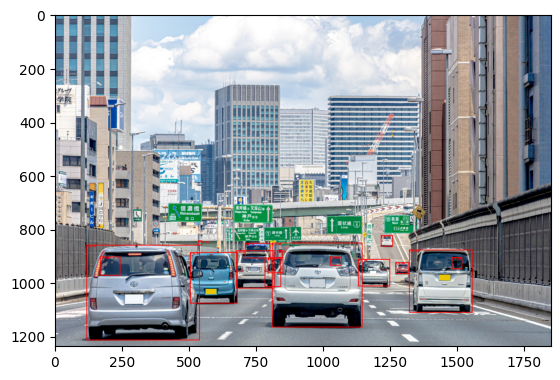

In [2]:
# Load the pre-trained model
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()

# Filter predictions with a threshold confidence score
confidence_threshold = 0.5
filtered_predictions = [
    (box, label, score)
    for box, label, score in zip(
        predictions[0]["boxes"], predictions[0]["labels"], predictions[0]["scores"]
    )
    if score > confidence_threshold
]

# Display the image with detected objects
display_image_with_boxes(img, *zip(*filtered_predictions))